# Лабораторная работа 5. 
 
---

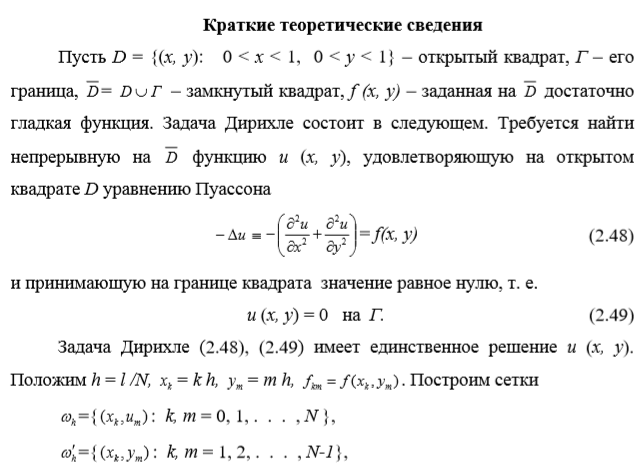
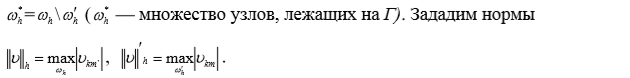
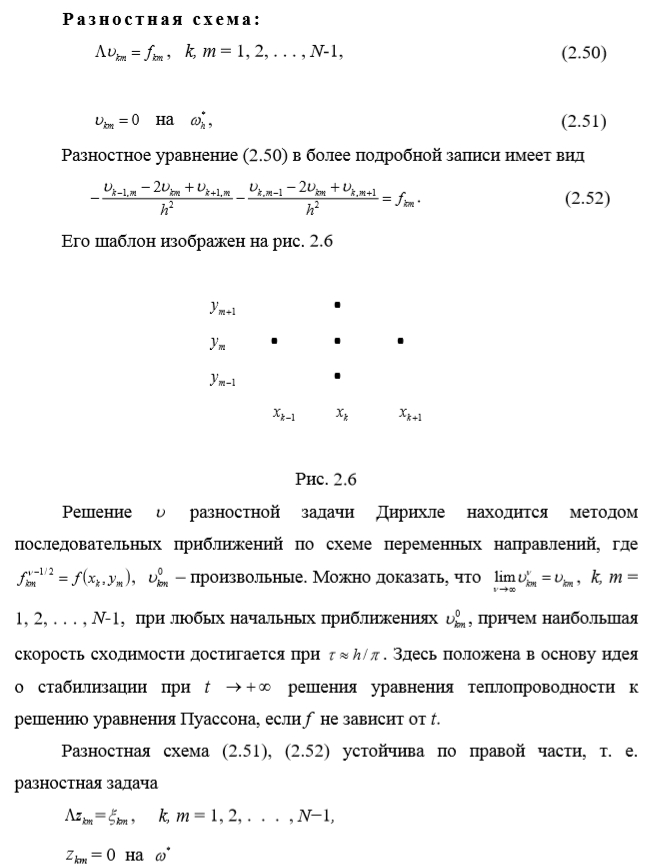
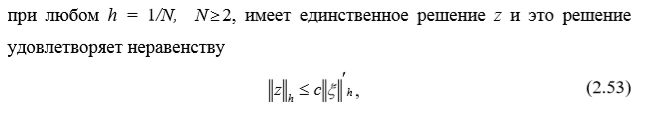
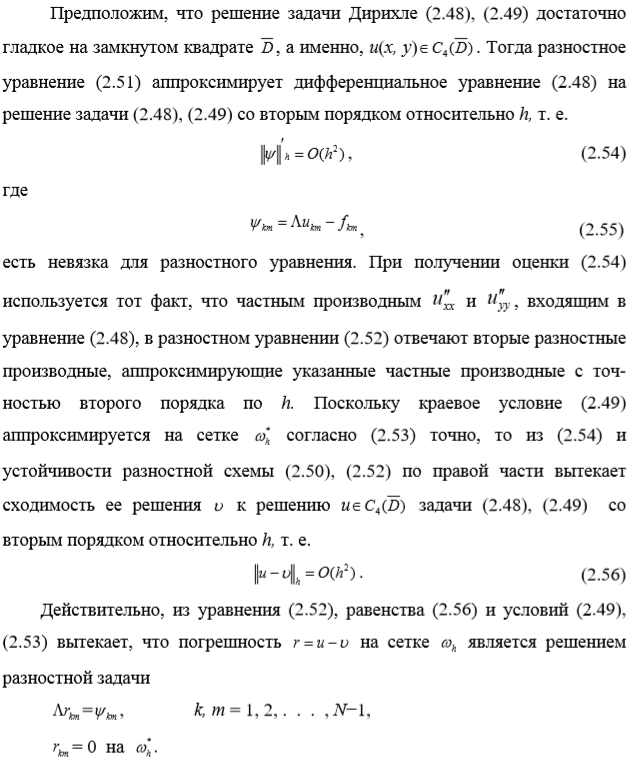
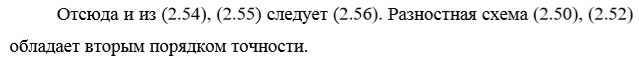
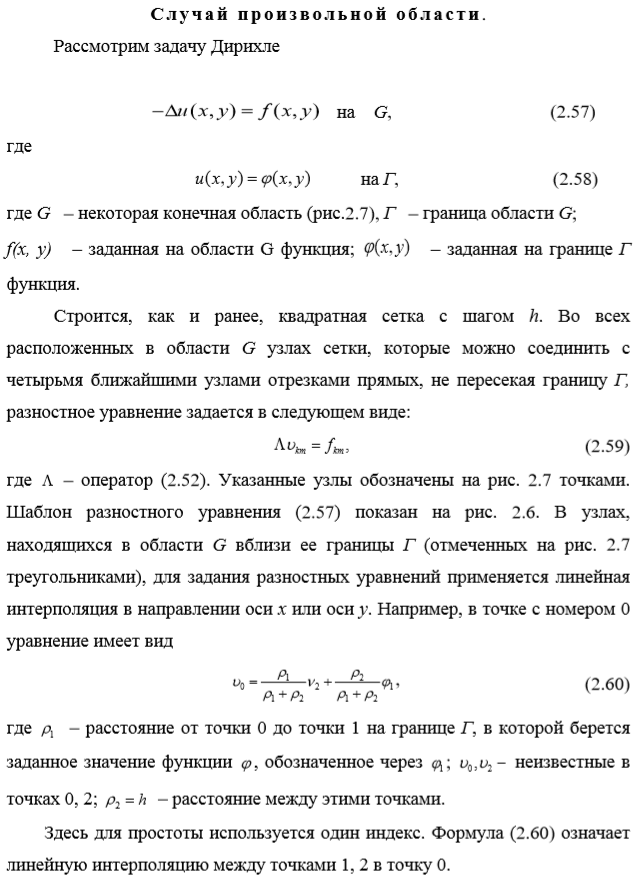
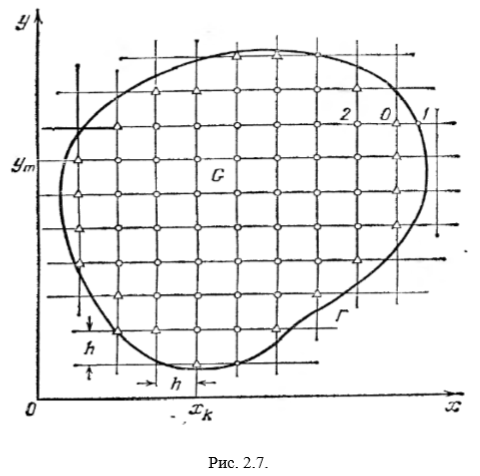
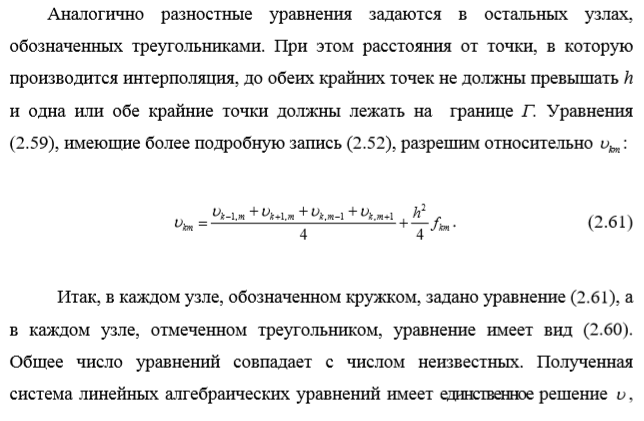
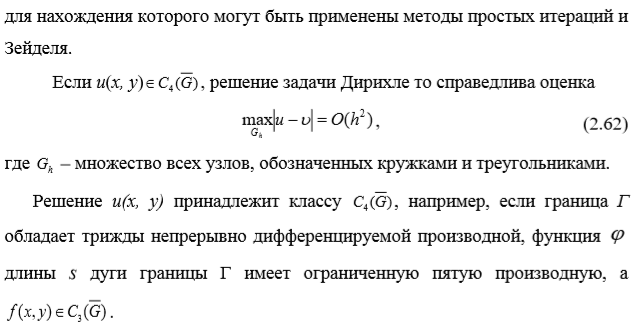
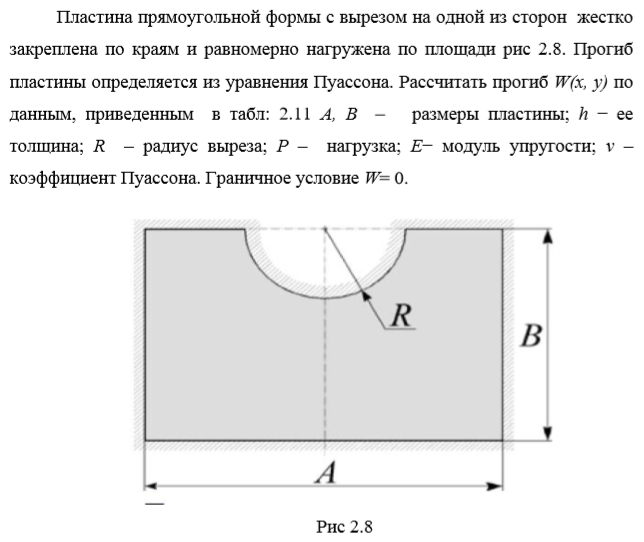
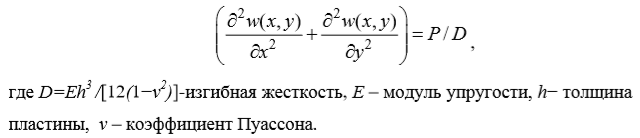


Исходные данные:


$A=180 мм, B=100 мм, R=25 мм, h=2 мм, P=70 * 10^9 H, E=60\frac{H}{м^2}, v=0.28$

### Решение

Запишем уравнение Пуассона:

### $-\nabla u = (\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}) = f(x,y)$

В нашем случае получим:

### $(\frac{\partial^2 u(x,y)}{\partial x^2} + \frac{\partial^2 u(x,y)}{\partial y^2}) = f(x,y)$

где

### $f(x,y) = \frac{P}{D} = \frac{P[12(1-v^2}{EH^3}$

Запишем разностную схему для внутренних точек:

### $v_{xy} = \frac{v_{x-1y} + v_{x+1y} + v_{xy-1} + v_{xy+1}}{4} - \frac{h^2}{4}f(x,y)$

где $h$ – шаг по $x$ и $y$

Разносная схема в граничных точках:

### $v= \frac{p_1}{p_1+p_2}v_2 + \frac{p_2}{p_1+p_2}\varphi_1$

где $p_i$ - расстояние до границы,
$p_2$ - расстояние до ближайшей внутренней точки,
$v_2$ - значение функции в ближайшей внутренней точке,
$\varphi_1$ - граничное условие


### Проинициализируем нашу сетку:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [2]:
A = 180
B = 100
R = 30
d = 2
P = 70
E = 60
v = 0.28

In [3]:
D = 10 * E * d**3 / (12 * (1 - v**2))
P / D

0.16128

In [4]:
h = 2
nx = len(np.arange(0, A + h, h))
ny = len(np.arange(0, B + h, h))

In [5]:
def plot(nx, ny, h, u):
    s = np.arange(0, A + h, h)
    t = np.arange(0, B + h, h)
    tGrid, sGrid = np.meshgrid(t, s)

    surface = go.Surface(x=sGrid, y=tGrid, z=u.T)
    data = [surface]

    layout = go.Layout(
        title='Parametric Plot',
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                title='t',
                gridcolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            zaxis=dict(
                title='u(x, t)',
                gridcolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            )
        )
    )

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.plot(fig, auto_open=True)

In [6]:
u = np.zeros((ny, nx))

for i in range(ny):
    for j in range(nx):
        if np.sqrt((A / 2 - h * j)**2 + (i * h)**2) <= R or \
           i == 0 or j == 0 or i == ny - 1 or j == nx - 1:
            u[i][j] = 1

plot(nx, ny, h, u);

При $h=2$

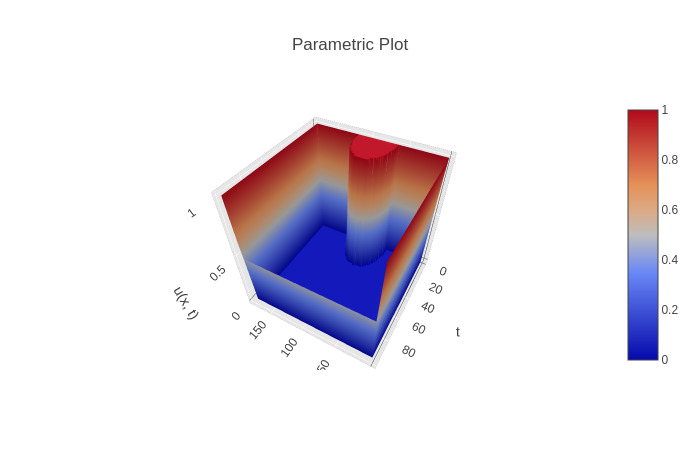

In [7]:
def get_u(eps):
    cur_error = 1

    iters = 0
    while cur_error > eps:
        cur_error = 0
        iters += 1
        for i in range(1, ny - 1):
            for j in range(1, nx - 1):
                if np.sqrt((A / 2 - h * j)**2 + (i * h)**2) <= R:
                    u[i][j] = 1
                else: 
                    prev = u[i][j]
                    u[i][j] = (u[i, j + 1] + u[i + 1, j] + u[i - 1, j] + u[i, j - 1] - h * h * P / D) / 4
                    error = abs(prev - u[i][j])
                    cur_error = max(error, cur_error)
        print(cur_error)

    return iters, u

In [9]:
%%time
iters, u = get_u(0.001)
plot(nx, ny, h, u) 

0.0009943272511350187
CPU times: user 91.4 ms, sys: 4 ms, total: 95.4 ms
Wall time: 96.5 ms


Для начала посчитаем значения функции в граничных точках по формуле

### $v= \frac{p_1}{p_1+p_2}v_2 + \frac{p_2}{p_1+p_2}\varphi_1$

Затем вычислим ответ для всех внутренних точек по формуле:

### $v_{xy} = \frac{v_{x-1y} + v_{x+1y} + v_{xy-1} + v_{xy+1}}{4} - \frac{h^2}{4}f(x,y)$

Точность: $v_{xy} - v_{prev(xy)}$ , где $v_{prev(xy)}$ - предыдущее значение $v_{xy}$

Вычислив значения во внутренних точках, получим:

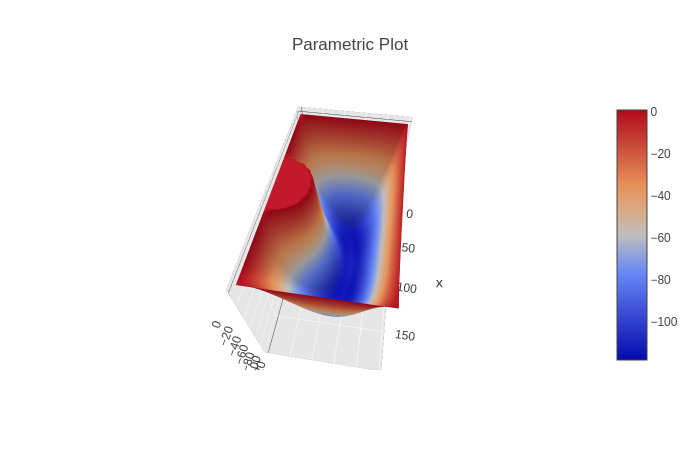
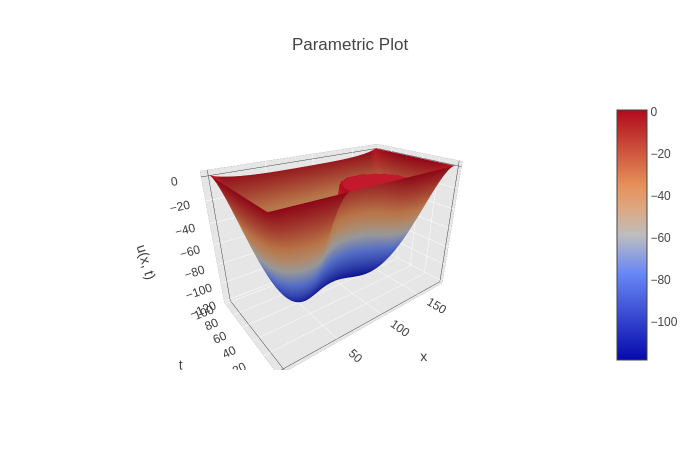

Как видим, наибольший прогиб находится в центре пластины.

0.725759999999988
0.7257599999994505
0.7257599999876057
0.7257599998171713
0.7257599980163549
0.7257599831180168
0.7257598826256144
0.7257593143741321
0.7257565653810696
0.7257450111613721
0.7257260106881986
0.7256780508700222
0.725624878642348
0.7255321102664514
0.7253724610018235
0.7251676382691468
0.7249043959121231
0.7245987389845752
0.7241904030587563
0.723659713520604
0.7230314709089232
0.722330022894635
0.7214912317644906
0.7205050231112224
0.7193709490777636
0.7182374127378779
0.716960593251688
0.7155363074655057
0.7139619156176629
0.7122362003284763
0.7105130847884809
0.7086714599115247
0.7066965520049457
0.7045898664762191
0.702353614486924
0.6999906146863282
0.6975042002228058
0.6948981321451626
0.692176519812822
0.6893437485744087
0.6865413176943136
0.6836777801535447
0.6807229168903675
0.6776807399294746
0.6745553237921129
0.6713507751582029
0.6680712062653384
0.6647207117728442
0.6613033488131634
0.6578231199539033
0.6542839588006046
0.6506897179804696
0.6470620111919345


0.0420241633533891
0.04169799142765385
28
0.04137432839918631
0.041053155347000825
0.04073445348637961
0.04041820416802011
0.04010438887716816
0.03979298923277952
0.03948398698653932
0.039177364022236816
0.03887310235465691
0.03857118412891225
0.03827159161956217
0.037974307229674764
0.03767931349010212
0.03738659305864189
0.037096128719070975
0.03680790338053441
0.03652190007659328
0.036238101964300995
0.03595649232363485
0.03567705455658654
0.03539977218619583
0.03512462885593948
0.034851608328978045
0.03458069448706169
0.034311871330075405
0.03404512297507267
0.03378043365549388
0.03351778772045577
0.03325716963394143
0.03299856397400447
0.03274195543201586
0.03248732881189653
0.0322346690294637
0.03198396111143609
0.03173530186883511
0.03148858435848467
36
0.031243772521534652
0.0310008518373337
0.03075980789259347
0.030520626380535987
0.030283293100339392
0.03004779395632795
0.02981411495720465
0.029582242215383303
0.02935216194632062
0.029123860467677787
0.02889732419865254
0.028

0.0018461260341950947
0.0018316918001062277
0.0018173703367949656
0.0018031607641546543
0.0017890622090419583
0.0017750738050779091
0.0017611946925910615
0.0017474240186317047
0.0017337609369434404
0.0017202046078068634
0.0017067541980395617
0.001693408880981906
0.0016801678364259942
0.0016670302504877554
0.0016539953157064247
0.0016410622309024347
0.001628230201006886
0.0016154984373599746
0.0016028661572988767
0.0015903325842856475
0.0015778969478787985
0.0015655584836054004
0.0015533164329184501
0.0015411700432537145
0.0015291185678876218
0.0015171612658804179
0.0015052974020903775
0.0014935262471169608
0.0014818470772581804
0.0014702591743969151
0.001458761826043542
0.001447354325307515
0.0014360359707126236
0.0014248060663106799
0.0014136639216388858
0.001402608851449827
0.001391640175981479
0.0013807572207582552
0.0013699593165057422
0.0013592457991649098
0.001348616009877901
0.0013380692949738204
0.0013276050058124156
0.0013172224987982872
0.0013069211354235222
0.001296700282097

3.951351331014814
3.9511904219372758
3.949757858480565
3.941616067500453
3.926690464767068
3.8905768354283303
3.85071779522503
3.7937006260792963
3.72339117248708
3.64712356269046
3.558846386162543
3.4610718217049907
3.357383405322601
3.2597683660414063
3.1592063003531194
3.056955864855148
2.954103995596313
2.8565774406882767
2.760848534761706
2.6657034493647416
2.5716842906062993
2.4792210489311657
2.388646651193028
2.3030622894628436
2.221418025368294
2.1416737662023877
2.063950476142594
1.9883353189248254
1.9148870510610578
1.8436407607863714
1.774611970001203
1.7080396190509788
1.6446828167841403
1.5834095007004123
1.5241859994963392
1.4669739100416308
1.4117310738115947
1.3591345897879847
1.3086632495847539
1.2599098046120787
1.212833196641384
1.1673912228365708
1.1235408714084514
1.0812386146412933
1.0404406634526424
1.0011031874326335
0.963182504045804
0.9266352403937077
0.8914184706428188
0.8574898319362347
0.8251483229318808
0.7939829735148294
0.7639495365483242
0.735011390365

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

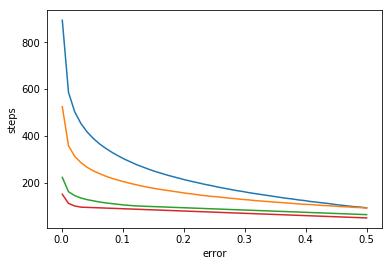

In [15]:
u1 = np.copy(u)

for h in [3, 4, 7, 9]:
    nx = len(np.arange(0, A + h, h))
    ny = len(np.arange(0, B + h, h))
    u = np.zeros((ny, nx))

    for i in range(ny):
        for j in range(nx):
            if np.sqrt((A / 2 - h * j)**2 + (i * h)**2) <= R or \
               i == 0 or j == 0 or i == ny - 1 or j == nx - 1:
                u[i][j] = 1
                
    iters = []
    for i, eps in enumerate(epsilons):
        it, u = get_u(eps)
        if i == 0:
            iters.append(it)
        else:
            iters.append(it + iters[i - 1])
        print(it)
    
    #dx, dy = int(u.shape[1] / u1.shape[1]), int(u.shape[0] / u1.shape[0])
    #errors += np.mean(np.abs(u[::dx, ::dy] - u1))
    plot(nx, ny, h, u)
    
    plt.plot(epsilons, iters, label='h = {}'.format(h))

plt.xlabel('error')
plt.ylabel('steps')
plt.label()
plt.show()

Исследуем модели при разных шагах $h$. Построим графики полученных сеточных функций при разных шагах:

1. При $h = 3$
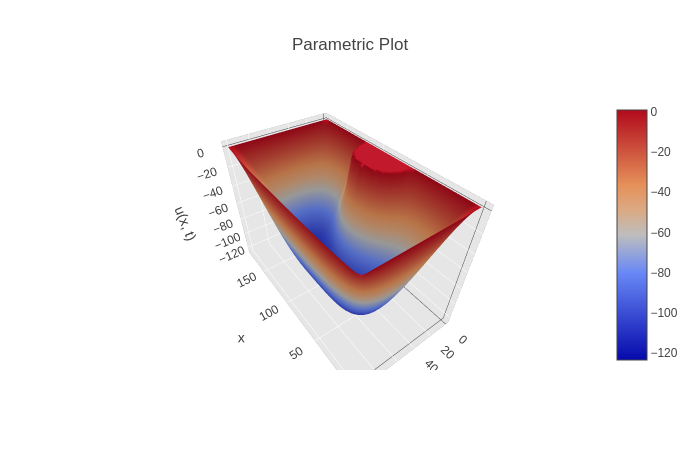

2. При $h = 4$
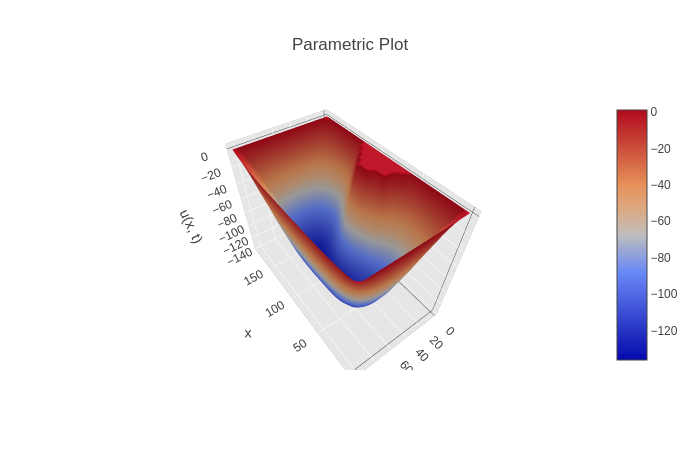

3. При $h = 7$
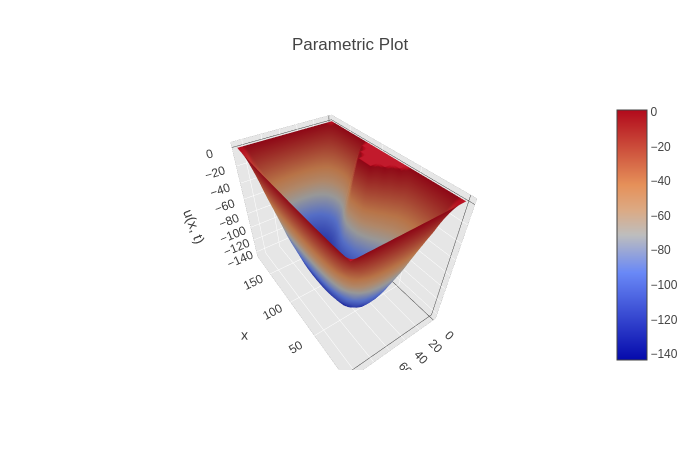

4. При $h = 9$
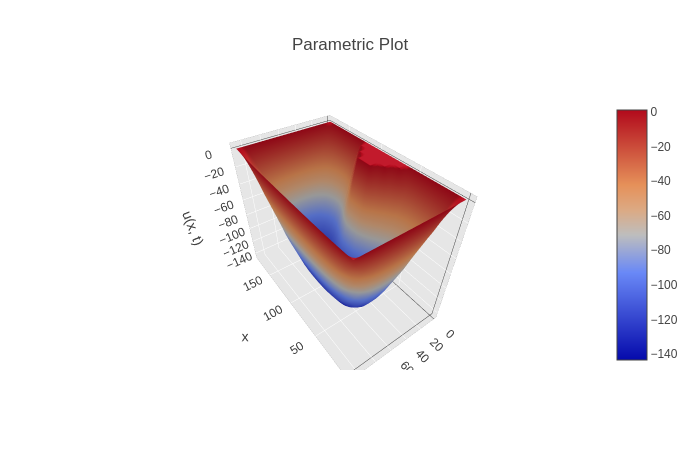

Далее построим графики зависимости количества итераций от величины шага h:
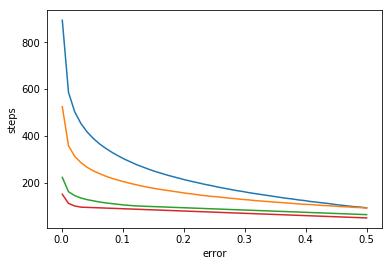

## Вывод

В результате данной работы была написана программная реализация решения задачи Дирихле, а также исследована сложность решения и ее зависимость от значения ошибки.